<a href="https://colab.research.google.com/github/DonRoboto/KalmanFilter_v1/blob/main/KalmanFilter_2D_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import math functions
from math import *
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
#kalman filter 1d
class Kalman_1D():

  def __init__(self, i, x, y):
    self.i = i
    self.x_est = x
    self.x_prd = 0
    self.y_est = y
    self.y_prd = 0
    self.P = 1000
    self.z_x = 0
    self.z_y = 0
    self.K = 0
    self.fit = 1000000
  

In [3]:
def fitness(x, y):
  #Sphere
  #f = x**2.0 + y**2.0

  f = (418.9829 * 2) -  ( ( x * np.sin((np.sqrt(np.abs(x) ) ) ) )  + ( y * np.sin((np.sqrt(np.abs(y) ) ) ) )   )
  #return f

  #Rastrigin 
  #f = (10*2) +  ( (x**2 - (10*np.cos(2*np.pi*x))) + (y**2 - (10*np.cos(2*np.pi*y))) )
  return f



In [4]:
class Poblacion():
  p = []

  def __init__(self, n, x_min, x_max):

    for i in range(n):
      x_1 = random.uniform(x_min, x_max)
      y_1 = random.uniform(x_min, x_max)
      ind = Kalman_1D(i, x_1, y_1)
      self.p.append(ind)

In [5]:
v_min = -500
v_max = 500
n_pob = 5

f_best = 1000000
f_true = 1000000

x_best = 1000000
x_true = 1000000

pob = Poblacion(n_pob, v_min, v_max)

for v in range(n_pob):
  print("x: {}, y: {}".format(pob.p[v].x_est, pob.p[v].y_est))

x: -11.901498712482805, y: 283.9309439320764
x: -221.77509892838646, y: 240.65997257996185
x: 394.6608411434521, y: 224.2084892603259
x: 91.7894379471386, y: 184.66831854864836
x: -370.42180174768924, y: 17.620218536086668


In [6]:

Q = 0.5
R = 0.5
n_time = 100


progress_x = np.zeros((n_pob, n_time ))
progress_y = np.zeros((n_pob, n_time ))
progress_f = np.zeros((n_pob, n_time ))


for t in range(n_time):
   
  #evaluar el fitness de los agentes
  for f in range(n_pob):
    pob.p[f].f = fitness(pob.p[f].x_est, pob.p[f].y_est)

  
  #actualizar x_best y x_true
  for b in range(n_pob):    
    if pob.p[b].f < f_best:
      x_best = pob.p[b].x_est
      y_best = pob.p[b].y_est
      f_best = pob.p[b].f

    if f_best<f_true:
      x_true = x_best
      y_true = y_best
      f_true = f_best


  #predict (the current predicted state, is assumed to be the estimated value)
  for p in range(n_pob):
    pob.p[p].x_prd = pob.p[p].x_est
    pob.p[p].y_prd = pob.p[p].y_est
    pob.p[p].P = pob.p[p].P + Q


  #measure
  for m in range(n_pob):
    r1 = random.uniform(0, 1)
    r2 = random.uniform(0, 1)
    pob.p[m].z_x = pob.p[m].x_prd + np.sin(r1 * 2 * np.pi) * np.abs(pob.p[m].x_prd -  x_true)
    pob.p[m].z_y = pob.p[m].y_prd + np.sin(r2 * 2 * np.pi) * np.abs(pob.p[m].y_prd -  y_true)

  #estimate
  for e in range(n_pob):
    pob.p[e].K = pob.p[e].P / (pob.p[e].P + R)
    pob.p[e].x_est = pob.p[e].x_prd + pob.p[e].K * (pob.p[e].z_x - pob.p[e].x_prd) 
    pob.p[e].y_est = pob.p[e].y_prd + pob.p[e].K * (pob.p[e].z_y - pob.p[e].y_prd) 
    pob.p[e].P = (1 - pob.p[e].K) * pob.p[e].P

    

    #si sale del rango
    if np.abs(pob.p[e].x_est)>v_max:
      pob.p[e].x_est = random.uniform(v_min, v_max)
    #  print(pob.p[e].x_est)
    if np.abs(pob.p[e].y_est)>v_max:
      pob.p[e].y_est = random.uniform(v_min, v_max)
    #  print(pob.p[e].y_est)

    progress_x[e][t] = pob.p[e].x_est
    progress_y[e][t] = pob.p[e].y_est
    progress_f[e][t] = f_true

    #print("I:{}, X: {}, Y: {}, P: {}, K: {})".format(pob.p[e].i, pob.p[e].x_est, pob.p[e].y_est, pob.p[e].P, pob.p[e].K) )
  #print("\n")

print("\n")
print("x_true: {}".format(x_true))
print("y_true: {}".format(y_true))
print("f_true: {}".format(f_true))



x_true: 393.8308032137396
y_true: 214.9802944859385
f_true: 321.4815426279263


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


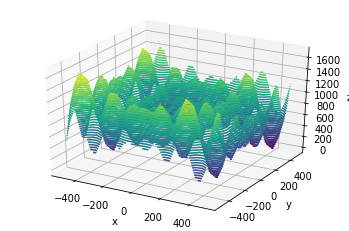

In [7]:

x = np.linspace(-500, 500, 30)
y = np.linspace(-500, 500, 30)

X, Y = np.meshgrid(x, y)
Z = fitness(X, Y)



fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)

ax.scatter(x_true,y_true,f_true, color='red') # plot the point (2,3,4) on the figure


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');



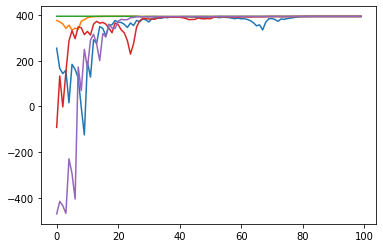

In [8]:

   
g_time = []
g_x1 = []
g_x2 = []
g_x3 = []
g_x4 = []
g_x5 = []
  
for g in range(n_time):
  g_time.append(g)
  g_x1.append(progress_x[0][g])
  g_x2.append(progress_x[1][g])
  g_x3.append(progress_x[2][g])
  g_x4.append(progress_x[3][g])
  g_x5.append(progress_x[4][g])

plt.plot(g_time, g_x1, color='C0')
plt.plot(g_time, g_x2, color='C1')
plt.plot(g_time, g_x3, color='C2')
plt.plot(g_time, g_x4, color='C3')
plt.plot(g_time, g_x5, color='C4')

plt.show()

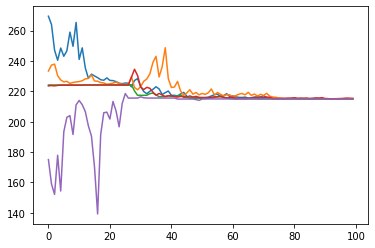

In [9]:
g_time = []
g_y1 = []
g_y2 = []
g_y3 = []
g_y4 = []
g_y5 = []
  
for g in range(n_time):
  g_time.append(g)
  g_y1.append(progress_y[0][g])
  g_y2.append(progress_y[1][g])
  g_y3.append(progress_y[2][g])
  g_y4.append(progress_y[3][g])
  g_y5.append(progress_y[4][g])

plt.plot(g_time, g_y1, color='C0')
plt.plot(g_time, g_y2, color='C1')
plt.plot(g_time, g_y3, color='C2')
plt.plot(g_time, g_y4, color='C3')
plt.plot(g_time, g_y5, color='C4')

plt.show()

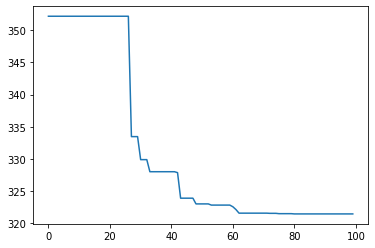

In [10]:
g_time = []
g_f1 = []
g_f2 = []
g_f3 = []
g_f4 = []
g_f5 = []
  
for g in range(n_time):
  g_time.append(g)
  g_f1.append(progress_f[0][g])
  #g_f2.append(progress_f[1][g])
  #g_f3.append(progress_f[2][g])
  #g_f4.append(progress_f[3][g])

plt.plot(g_time, g_f1, color='C0')
#plt.plot(g_time, g_f2, color='C1')
#plt.plot(g_time, g_f3, color='C2')
#plt.plot(g_time, g_f4, color='C3')

plt.show()